In [4]:
data_c_oneweek = [1, 0, 0, 1, 0, 0, 0]

In [5]:
dataC = data_c_oneweek*8

In [25]:
gathertime = 56

In [6]:
import numpy as np

In [15]:
import matplotlib.pyplot as plt

## Cycle Number Detection -> Using DC Component

In [7]:
dataC_coefficient = np.fft.fft(dataC)

In [8]:
dataC_coefficient

array([16.        +0.j        ,  0.        +0.j        ,
        0.        +0.j        ,  0.        +0.j        ,
        0.        +0.j        ,  0.        +0.j        ,
        0.        +0.j        ,  0.        +0.j        ,
        0.79224906-3.47106991j,  0.        +0.j        ,
        0.        +0.j        ,  0.        +0.j        ,
        0.        +0.j        ,  0.        +0.j        ,
        0.        +0.j        ,  0.        +0.j        ,
       12.98791841+6.25465186j,  0.        +0.j        ,
        0.        +0.j        ,  0.        +0.j        ,
        0.        +0.j        ,  0.        +0.j        ,
        0.        +0.j        ,  0.        +0.j        ,
        6.21983253-7.7994233j ,  0.        +0.j        ,
        0.        +0.j        ,  0.        +0.j        ,
        0.        +0.j        ,  0.        +0.j        ,
        0.        +0.j        ,  0.        +0.j        ,
        6.21983253+7.7994233j ,  0.        +0.j        ,
        0.        +0.j        ,

In [11]:
dc_component = dataC_coefficient[0]
dc_component

(16+0j)

In [14]:
abs(dataC_coefficient)

array([16.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  3.56033494,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , 14.41550189,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  9.97583683,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  9.97583683,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       14.41550189,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  3.56033494,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ])

Text(0, 0.5, 'DFT coefficients')

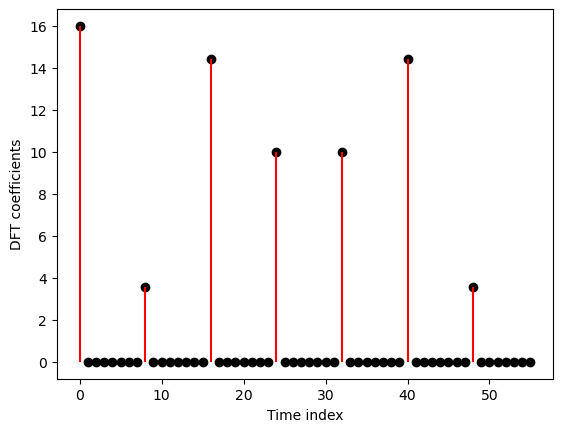

In [24]:
plt.scatter(np.arange(0, len(dataC)), abs(dataC_coefficient), color="black")
plt.vlines(np.arange(0, len(dataC)), ymin=0, ymax=abs(dataC_coefficient), color="red")
plt.xlabel("Time index")
plt.ylabel("DFT coefficients")



In [32]:
abs(gathertime/dc_component)

3.5

### 즉 3.5일에 한번 사건이 발생하는 것으로 볼 수 있다.

## Period Detectioin -> Using Spectral Analysis

In [33]:
data_a_oneweek = [1, 0, 0, 0, 0, 0, 0]
dataA = np.array(data_a_oneweek*8)
print(dataA.shape)

(56,)


In [64]:
from scipy import signal

In [65]:
freqs, times, spectrogram = signal.spectrogram(dataA, nperseg=gathertime)

[0.1429 0.2857 0.4286]


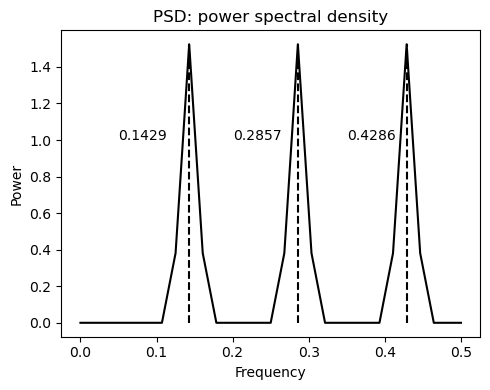

In [76]:
freqs, psd = signal.welch(dataA, nperseg=gathertime)

# 소수 넷째 자리까지 맞쳐줌
freqs = np.round(freqs, 4)
psd = np.round(psd, 4)

max_indexs = []
max_psd = max(psd)
for i in range(len(freqs)):
    if psd[i] == max_psd:
        max_indexs.append(i)

print(freqs[max_indexs])

plt.figure(figsize=(5, 4))
plt.plot(freqs, psd, color="black")
plt.vlines(freqs[max_indexs], ymin=0, ymax=psd[max_indexs], color="black", linestyles='--')
plt.annotate('0.1429', xy=(0.05, 1))
plt.annotate('0.2857', xy=(0.2, 1))
plt.annotate('0.4286', xy=(0.35, 1))
plt.title('PSD: power spectral density')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()

In [70]:
1/0.1429

6.997900629811057

### 즉 7일을 Period로 가지는 것을 확인함.

## Signal Shift Detection -> Convolution Theorem

In [78]:
data_b_oneweek = [0, 0, 0, 1, 0, 0, 0]
dataB = data_b_oneweek*8

In [87]:
dataA_coefficient = np.fft.fft(dataA)
dataB_coefficient = np.fft.fft(dataB)

In [91]:
print(len(dataA_coefficient))
print(len(dataB_coefficient))

56
56


In [94]:
convolution = np.convolve(dataA_coefficient, dataB_coefficient, "same")
print(convolution.shape)

(56,)


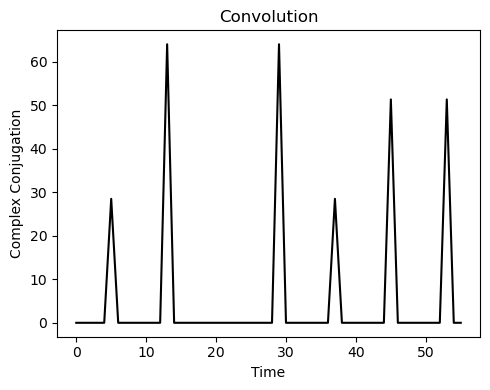

In [96]:
plt.figure(figsize=(5, 4))
plt.plot(np.arange(0, gathertime), abs(convolution), color="black")
# plt.vlines(freqs[max_indexs], ymin=0, ymax=psd[max_indexs], color="black", linestyles='--')
# plt.annotate('0.1429', xy=(0.05, 1))
# plt.annotate('0.2857', xy=(0.2, 1))
# plt.annotate('0.4286', xy=(0.35, 1))
plt.title('Convolution')
plt.xlabel('Time')
plt.ylabel('Complex Conjugation')
plt.tight_layout()